# Müzik Duygularının Sınıflandırılması
## Turkish Music Emotion Dataset ile Veri Analizi

Bu projede, UCI Machine Learning Repository'den alınan **Turkish Music Emotion** veri seti kullanılarak müzik parçalarının taşıdığı duygular sınıflandırılmıştır. Veri seti 400 örnek ve 50 farklı akustik özelliği içermektedir. Amaç, müziklerin `happy`, `sad`, `relax`, `angry` gibi etiketlere doğru şekilde atanmasını sağlamaktır.

Bu çalışma kapsamında:
- Veriler ön işlenmiştir (ölçekleme, etiketleme),
- İki farklı makine öğrenmesi algoritması uygulanmıştır: **KNN** ve **SVM**,
- Sonuçlar sayısal ve grafiksel olarak karşılaştırılmıştır.

In [1]:
# Gerekki kütüphaneleri içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.manifold import TSNE

In [2]:
# Veri setini yükle
df = pd.read_csv("dataset/Acoustic_Features.csv")
df.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


In [3]:
# Veri setini önizle
print("Satır ve sütun sayısı:", df.shape)
print("Sütun isimleri:", df.columns)
print("Eksik veri kontrolü:", df.isnull().sum())
df.describe()  # İstatistiksel özet

Satır ve sütun sayısı: (400, 51)
Sütun isimleri: Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


## Veri Ön İşleme

- **LabelEncoder** ile sınıflar sayıya çevrilmiştir.
- **StandardScaler** kullanılarak tüm özellikler normalize edilmiştir.
- Veriler eğitim (%80) ve test (%20) olmak üzere ikiye ayrılmıştır.

In [4]:
# Veri seti ön işleme
# Label sütunu varsa 'emotion' veya benzeri
label_col = "Class"  # Gerçek etiket sütun ismini kontrol et!
X = df.drop(label_col, axis=1)
y = df[label_col]

# Etiketleri sayıya çevir
le = LabelEncoder()
y = le.fit_transform(y)

class_names = le.classes_

# Normalizasyon
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim/test ayırımı
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Kullanılan Modeller

### 1. KNN (K-En Yakın Komşu)
- Parametre: `k = 5`
- Basit ve yorumlanabilir bir algoritmadır.
- Özellikle küçük veri setlerinde hızlı sonuç verir.

### 2. SVM (Destek Vektör Makineleri)
- `rbf` çekirdeği ile kullanılmıştır.
- Sınıflar arası maksimum ayrımı hedefler.
- Genelde daha yüksek doğruluk sağlar.

In [5]:
# Modelleme (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [6]:
# Modelleme (SVM)
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## Sayısal Karşılaştırma

- Accuracy (Doğruluk):
  - KNN: %62.0 
  - SVM: **%81.0** 
- `classification_report` ile Precision, Recall ve F1-Score detayları incelenmiştir.

In [7]:
# Doğruluk Oranları
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"KNN Doğruluk Oranı: {accuracy_knn:.2f}")
print(f"SVM Doğruluk Oranı: {accuracy_svm:.2f}")

# Sınıflandırma Raporları
print("\nKNN Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_knn, target_names=class_names))

print("\nSVM Sınıflandırma Raporu:\n")
print(classification_report(y_test, y_pred_svm, target_names=class_names))

KNN Doğruluk Oranı: 0.62
SVM Doğruluk Oranı: 0.81

KNN Sınıflandırma Raporu:

              precision    recall  f1-score   support

       angry       0.64      0.78      0.70        18
       happy       0.59      0.94      0.72        18
       relax       0.79      0.42      0.55        26
         sad       0.53      0.44      0.48        18

    accuracy                           0.62        80
   macro avg       0.64      0.65      0.61        80
weighted avg       0.65      0.62      0.61        80


SVM Sınıflandırma Raporu:

              precision    recall  f1-score   support

       angry       0.86      0.67      0.75        18
       happy       0.77      0.94      0.85        18
       relax       0.86      0.92      0.89        26
         sad       0.75      0.67      0.71        18

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.81      0.81        80



## Görselleştirme

### 1. Confusion Matrix (Karışıklık Matrisi)
Her modelin tahmin başarısı, gerçek sınıflarla kıyaslanarak görselleştirilmiştir.

### 2. t-SNE ile Scatter Plot
Yüksek boyutlu veri, 2 boyuta indirgenerek sınıfların birbirinden ayrımı görselleştirilmiştir.

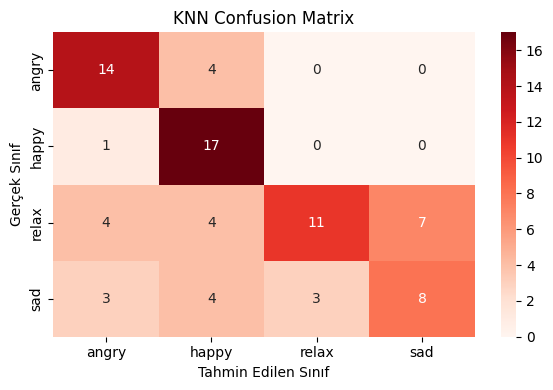

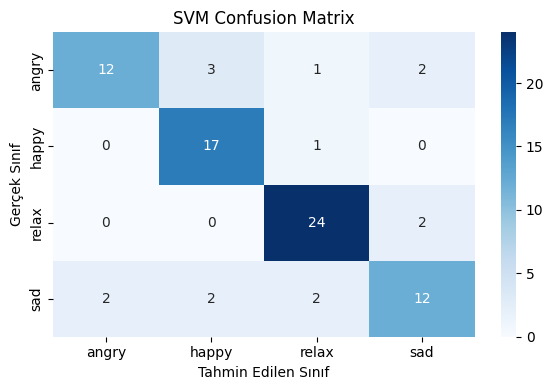

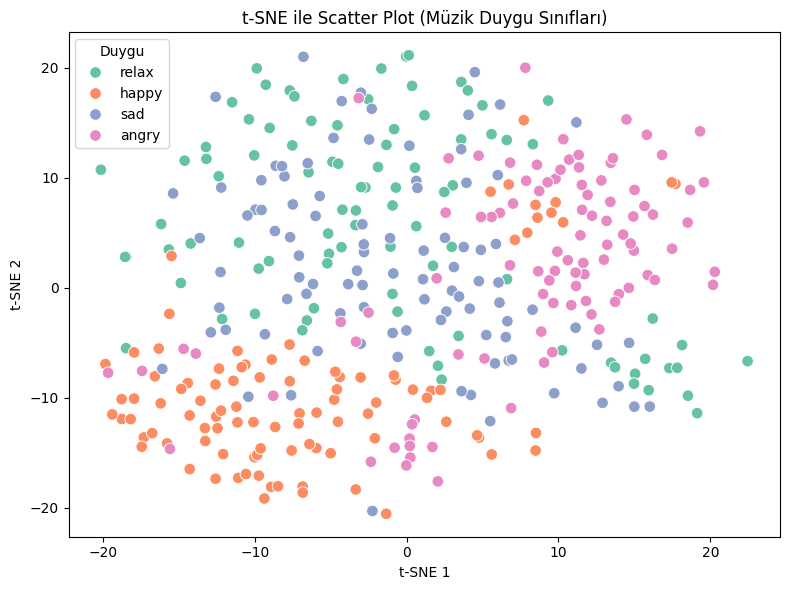

In [8]:
# Confusion Matrix – KNN
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_knn),
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("KNN Confusion Matrix")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# Confusion Matrix – SVM
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, y_pred_svm),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names,
)
plt.title("SVM Confusion Matrix")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()

# t-SNE ile görselleştirme
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# t-SNE sonuçlarını DataFrame'e çevir
tsne_df = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
tsne_df["Label"] = le.inverse_transform(y)  # orijinal etiketlerle görselleştirme

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="Label", palette="Set2", s=70)
plt.title("t-SNE ile Scatter Plot (Müzik Duygu Sınıfları)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(title="Duygu")
plt.tight_layout()
plt.show()

## Sonuç

- **SVM modeli**, `relax` ve `happy` sınıflarında yüksek başarı göstermiştir.
- **KNN modeli**, özellikle `sad` sınıfında zayıf kalmıştır.
- Genel olarak, **SVM modeli bu veri setinde daha etkili sonuçlar vermektedir.**